In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv('data/nyc-jobs-1.csv')
df = df.drop(df[df['Posting Date'] == 'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.'].index)
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,,,...,"Salary range for this position is: $42,405 - $...",,,,NaN,New York City residency is generally required ...,2011-06-24T00:00:00,NaN,2011-06-24T00:00:00,2018-07-17T00:00:00
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,,F,...,,"In addition to applying through this website, ...",,,NaN,New York City residency is generally required ...,2012-01-26T00:00:00,NaN,2012-01-26T00:00:00,2018-07-17T00:00:00
2,102221,DEPT OF ENVIRONMENT PROTECTION,External,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
3,102221,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
4,114352,DEPT OF ENVIRONMENT PROTECTION,Internal,5,Deputy Plant Chief,SENIOR STATIONARY ENGINEER (EL,91639,0,,F,...,Appointments are subject to OMB approval Fo...,"Click ""Apply Now"" button",40 per week / day,Various,NaN,New York City residency is generally required ...,2012-12-12T00:00:00,NaN,2012-12-13T00:00:00,2018-07-17T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,354147,HOUSING PRESERVATION & DVLPMNT,Internal,1,Project Manager,HOUSING DEVELOPMENT SPECIALIST,22507,1,"Engineering, Architecture, & Planning",F,...,,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16T00:00:00,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3414,354163,HOUSING PRESERVATION & DVLPMNT,External,1,"Project Manager, Neighborhood Stabilization",COMMUNITY COORDINATOR,56058,0,"Engineering, Architecture, & Planning",F,...,*** PLEASE NOTE: THE ACTUAL SALARY FOR THIS PO...,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16T00:00:00,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3415,354163,HOUSING PRESERVATION & DVLPMNT,Internal,1,"Project Manager, Neighborhood Stabilization",COMMUNITY COORDINATOR,56058,0,"Engineering, Architecture, & Planning",F,...,*** PLEASE NOTE: THE ACTUAL SALARY FOR THIS PO...,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16T00:00:00,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3418,354182,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director of Operations, Office of the E...",CITY RESEARCH SCIENTIST,21744,3,"Health Policy, Research & Analysis Social Serv...",F,...,,Apply online with a cover letter to https://a1...,,,NaN,New York City residency is generally required ...,2018-07-16T00:00:00,2018-07-27T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00


In [309]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,,,...,"Salary range for this position is: $42,405 - $...",,,,NaN,New York City residency is generally required ...,2011-06-24,NaN,2011-06-24T00:00:00,2018-07-17T00:00:00
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,,F,...,,"In addition to applying through this website, ...",,,NaN,New York City residency is generally required ...,2012-01-26,NaN,2012-01-26T00:00:00,2018-07-17T00:00:00
2,102221,DEPT OF ENVIRONMENT PROTECTION,External,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
3,102221,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
4,114352,DEPT OF ENVIRONMENT PROTECTION,Internal,5,Deputy Plant Chief,SENIOR STATIONARY ENGINEER (EL,91639,0,,F,...,Appointments are subject to OMB approval Fo...,"Click ""Apply Now"" button",40 per week / day,Various,NaN,New York City residency is generally required ...,2012-12-12,NaN,2012-12-13T00:00:00,2018-07-17T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,354147,HOUSING PRESERVATION & DVLPMNT,Internal,1,Project Manager,HOUSING DEVELOPMENT SPECIALIST,22507,1,"Engineering, Architecture, & Planning",F,...,,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3414,354163,HOUSING PRESERVATION & DVLPMNT,External,1,"Project Manager, Neighborhood Stabilization",COMMUNITY COORDINATOR,56058,0,"Engineering, Architecture, & Planning",F,...,*** PLEASE NOTE: THE ACTUAL SALARY FOR THIS PO...,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3415,354163,HOUSING PRESERVATION & DVLPMNT,Internal,1,"Project Manager, Neighborhood Stabilization",COMMUNITY COORDINATOR,56058,0,"Engineering, Architecture, & Planning",F,...,*** PLEASE NOTE: THE ACTUAL SALARY FOR THIS PO...,APPLY ONLINE,,100 Gold Street,NaN,New York City residency is generally required ...,2018-07-16,2018-08-15T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00
3418,354182,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director of Operations, Office of the E...",CITY RESEARCH SCIENTIST,21744,3,"Health Policy, Research & Analysis Social Serv...",F,...,,Apply online with a cover letter to https://a1...,,,NaN,New York City residency is generally required ...,2018-07-16,2018-07-27T00:00:00,2018-07-16T00:00:00,2018-07-17T00:00:00


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 0 to 3419
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         3326 non-null   int64         
 1   Agency                         3326 non-null   object        
 2   Posting Type                   3326 non-null   object        
 3   # Of Positions                 3326 non-null   int64         
 4   Business Title                 3326 non-null   object        
 5   Civil Service Title            3326 non-null   object        
 6   Title Code No                  3326 non-null   object        
 7   Level                          3326 non-null   object        
 8   Job Category                   3326 non-null   object        
 9   Full-Time/Part-Time indicator  3326 non-null   object        
 10  Salary Range From              3326 non-null   object        
 11  Salary Range To  

In [314]:
df_n = df[['Agency', 'Posting Date']].sort_values('Posting Date')
df_n['Posting Date'] = df_n['Posting Date'].dt.to_period('M').dt.to_timestamp()#.drop_duplicates()
df_n

,Agency,Posting Date
0,DEPARTMENT OF BUSINESS SERV.,2011-06-01
1,DEPARTMENT OF BUSINESS SERV.,2012-01-01
2,DEPT OF ENVIRONMENT PROTECTION,2012-06-01
3,DEPT OF ENVIRONMENT PROTECTION,2012-06-01
4,DEPT OF ENVIRONMENT PROTECTION,2012-12-01
...,...,...
3370,DEPT OF HEALTH/MENTAL HYGIENE,2018-07-01
3369,DEPT OF HEALTH/MENTAL HYGIENE,2018-07-01
3276,DEPT OF HEALTH/MENTAL HYGIENE,2018-07-01
3275,DEPT OF HEALTH/MENTAL HYGIENE,2018-07-01


In [315]:
df_pivot = df_n.pivot_table(columns=['Agency', 'Posting Date'], aggfunc=len)
df_n = df_pivot.reset_index().rename(columns={0: 'count'})
df_n

,Agency,Posting Date,count
0,ADMIN FOR CHILDREN'S SVCS,2015-03-01,2
1,ADMIN FOR CHILDREN'S SVCS,2015-05-01,2
2,ADMIN FOR CHILDREN'S SVCS,2016-01-01,2
3,ADMIN FOR CHILDREN'S SVCS,2016-02-01,2
4,ADMIN FOR CHILDREN'S SVCS,2016-03-01,2
...,...,...,...
395,TAXI & LIMOUSINE COMMISSION,2018-04-01,4
396,TAXI & LIMOUSINE COMMISSION,2018-05-01,8
397,TAXI & LIMOUSINE COMMISSION,2018-06-01,10
398,TAXI & LIMOUSINE COMMISSION,2018-07-01,10


<AxesSubplot:xlabel='Posting Date', ylabel='count'>

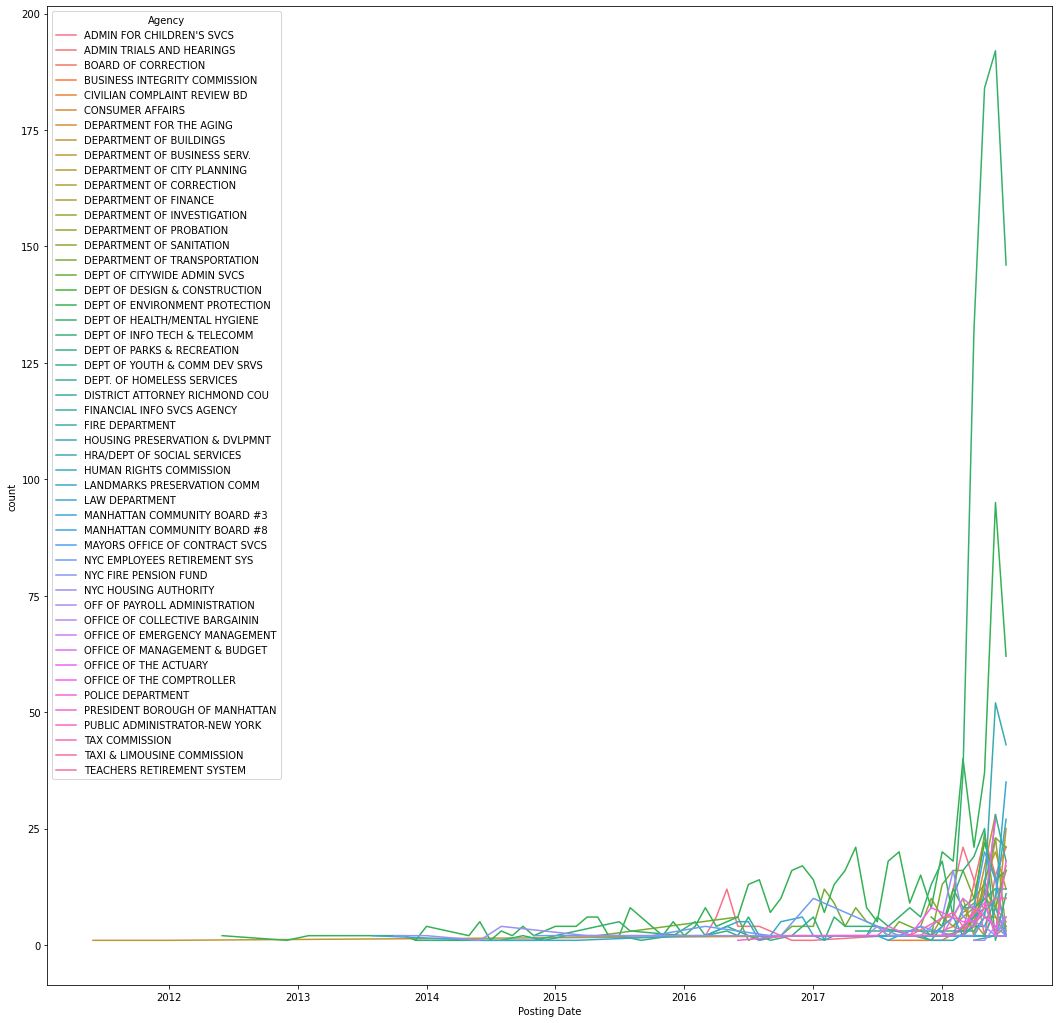

In [328]:
plt.figure(figsize=(18, 18))
sns.lineplot(data=df_n, x='Posting Date', y='count', hue='Agency')